###### Inferential Statistics:

Descriptive statistics uses the data to provide descriptions of the population, either through numerical calculations or graphs or tables. 
Inferential statistics makes __inferences and predictions about a population based on a sample of data__ taken from the population in question

Why Inferential Stats?
Suppose you need to collect data on a very large population. 
For example, suppose you want to know the average height of all the men in a city with a population of so many million residents. 
It isn't very practical to try and get the height of each man.

This is where inferential statistics helps making __inferences about the population using sample data__ 

How do we select Samples?
* Simple Random Sample
    * All members in a population have an equal chance of being selected in a sample
* Stratified Random Sample
    * All members in a Population are first divided into groups/ strata based on meaningfulness. 
    * The random samples are taken from each strata 
    
__Representativness__:
* Sample is assumed to be representative of the population. Any inference drawn from the Sample is believed to be true of the population

# Hypothesis Testing: First chapter in Inferential Statistics:
A statistical hypothesis is __an assumption about a population__

Hypothesis testing is __a procedure to accept or reject the assumption__ by using data from a sample	

### Hypothesis Testing Basics: 

There are two Hypotheses
1. Null Hypothesis
2. Alternate Hypothesis

#### Null Hypothesis
Ho : Sample is representative of the population, 
Observed differences in sample are just random chance occurrence 

#### Alternate Hypothesis
Ha : Sample is NOT representative of the population

#### Significance Level (denoted by alpha)
1. Significance level is a probability threshold that determines __when you reject the null hypothesis__
2. Alpha = 0.05 or 5% (widely followed)
3. Alpha = 0.10 or 10% (higher the significance level, higher is the power of the test)
4. Significance level = 1- confidencel level (95% confidence - widely followed)

### p-value:
* Proper Definition: a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

* Smply put: Probability of sample mean to be different from population mean because of RANDOM CHANCE

* Even more Simply Put: P-value is the prob of Ho to be true

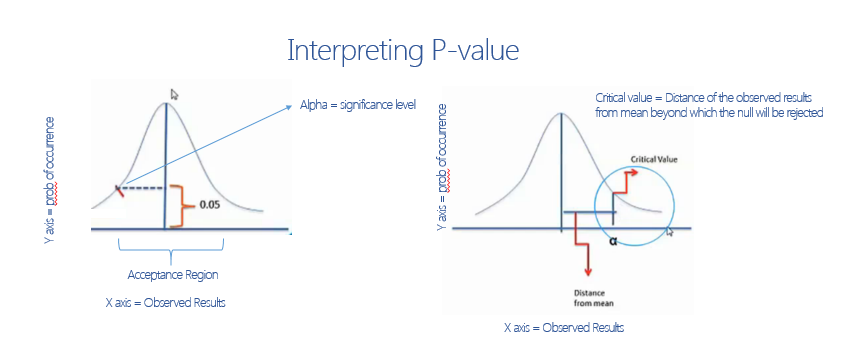

In [1]:
from IPython.display import Image
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Interpreting p value.PNG")

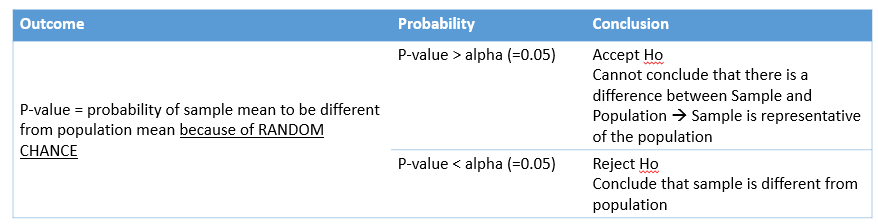

In [2]:
from IPython.display import Image
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\p-value with alpha.PNG")

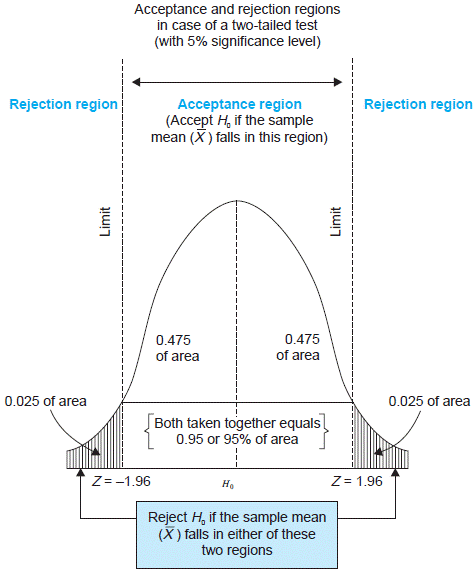

In [3]:
from IPython.display import Image
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Acceptance and Rejection Regions.png")

### T-Test:

The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.

### T-Test: 1. One Sample T Test

A one-sample t-test checks whether a sample mean differs from the population mean

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [5]:
Chennai_Population=pd.read_csv(r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Chennai_population_ages.csv",index_col=False)

In [6]:
Thirvanmayur_Sample=pd.read_csv(r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Thiruvanmayur_population_ages.csv",index_col=False)

In [7]:
print Chennai_Population.head(5)
print Chennai_Population.shape

   Chennai Voter Population Ages
0                             62
1                             59
2                             44
3                             53
4                             50
(250000, 1)


In [8]:
print Thirvanmayur_Sample.head(5)
print Thirvanmayur_Sample.shape

   Thirruvanmayur Voter Population Ages
0                                    56
1                                    54
2                                    40
3                                    48
4                                    45
(40, 1)


In [9]:
print Chennai_Population['Chennai Voter Population Ages'].mean()
print Thirvanmayur_Sample['Thirruvanmayur Voter Population Ages'].mean()

43.000112
44.7


We need to check if the __variation in sample mean from population mean is due to random chance__ via 1 sample T Test

1. Ho = Sample is representative of the population,Observed differences in sample are just random chance occurrence 
2. Ha = Sample is NOT representative of the population

1. if p-value < 0.05, reject Ho
2. if p-value > 0.05, accept Ho

In [10]:
stats.ttest_1samp(a=Thirvanmayur_Sample['Thirruvanmayur Voter Population Ages'], popmean= Chennai_Population['Chennai Voter Population Ages'].mean()) 

Ttest_1sampResult(statistic=1.1769205380634822, pvalue=0.24636046460588387)

p-value of 0.24 is greater than the alpha (significance level) of 0.05, hence __fail to reject the null hypothesis__ 
Sample mean is different from population mean __only due to random chance__

In other words, 
A p-value of 0.24 means we'd expect to see data like our sample due to chance about 24% of the time if the null hypothesis was true

### T-Test: 2. Two Sample T Test

A two-sample t-test investigates whether the means of two __independent data samples__ differ from one another

1. Ho = the means of both sample groups are the same
2. Ha = the means of both sample groups are NOT the same

Unlike the one sample-test where we test against a known population parameter, 
the two sample test only involves sample means

In [11]:
Adyar_Sample=pd.read_csv(r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Adyar_population_ages.csv",index_col=False)

In [12]:
print Thirvanmayur_Sample['Thirruvanmayur Voter Population Ages'].mean()
print Adyar_Sample['Adyar Voter Population Ages'].mean()

44.7
40.3


In [13]:
stats.ttest_ind(a=Thirvanmayur_Sample,b= Adyar_Sample, equal_var=False)

Ttest_indResult(statistic=array([ 2.28889368]), pvalue=array([ 0.0246249]))

With a p-value of 0.02 which is < 0.05, we reject the null hypothesis

In other words, The test yields a p-value of 0.0246249, which means there is a 2% chance we'd see sample data this far apart if the two groups tested are actually identical

2% is less than 5% significance level set

### T-Test: 3. Paired T Test

* Two sample T test is designed for __testing differences between independent groups__
* Paired T Test is designed for __testing differences between samples of the same group at different points in time__

In [ ]:
Ho = true mean difference between the paired samples is zero and any difference is due to random chance
Ha = true mean difference between the paired samples is NOT zero

In [14]:
Drug_Weight=pd.read_csv(r'E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Drug_weight.csv',index_col=False)

In [15]:
Drug_Weight.describe()

,After Weight in Kgs,Before Weight in Kgs,Weight change
count,100.000000,100.000000,100.000000
mean,78.623659,80.931375,2.307716
std,30.348341,29.671157,5.087777
min,-16.872836,-18.808483,-8.898299
25%,60.043202,64.099681,-0.528972
50%,79.455770,83.282051,2.389209
75%,97.699517,100.523318,5.464128
max,152.000871,157.625839,14.651559


The summary shows that patients lost about 2.3 Kgs on average after treatment. 
Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level

In [ ]:
Ho = There is no difference in weight after drug treatment
Ha = There is some difference in weight after drug treatment

In [16]:
stats.ttest_rel(a = Drug_Weight['Before Weight in Kgs'],b = Drug_Weight['After Weight in Kgs'])

Ttest_relResult(statistic=4.5358036561534547, pvalue=1.6124939682440241e-05)

The p-value in the test output shows that the 
chances of seeing this large of a difference between samples due to chance is way less than 1%

So __Ho is rejected__. And, that the drug treatment has had an effect on the weight loss

### A T-Test vs a Z Test:

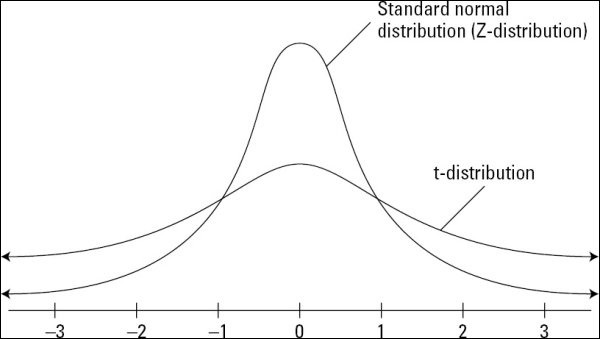

In [17]:
from IPython.display import Image
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\T Distribution and Z Distribution.jpg")

* A Z-distribution is similar to a T-distribution 
* Z-distribution is also centered at zero and has a basic bell shape, 
 - but its longer and pointier around the center than the t-distribution
* The T-distributions' standard deviation is usually proportionally larger than the Z, because of which you see the fatter tails on each side
* The t distribution is usually used to analyze the population __when the sample is small__
- And when we __do not know the population's Standard Deviation__ (which is most of the cases)
* In other words, for Z distribution, we need to know the population's Standard Deviation

### Anova

The t-test works well when dealing with two groups

__Analysis of Variance__ (Anova) lets you compare more than 2 groups

Specifically, Anova test lets us check whether __a numeric response variable__ varies according to __the levels of a categorical variable__

###### 1. One-way Anova

One-way ANOVA tests whether the __mean of a numeric variable__ differs across __the levels of one categorical variable__

In other words, A One-Way Analysis of Variance is a way to test the equality of three or more means at one time by using variances.

Assumptions:
* The populations from which the samples were obtained must be normally or approximately normally distributed.
* The samples must be independent.
* The variances of the populations must be equal.

In [18]:
US_Voter_Age_Race=pd.read_csv(r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\US_Voter_Age_Race.csv",index_col=False)

In [19]:
print US_Voter_Age_Race.shape
print US_Voter_Age_Race.head(5)

(1000, 2)
   US_Voter_Age US_Voter_Race
0            45         white
1            47         asian
2            43         white
3            49         white
4            48         other


In [20]:
US_Voter_Age_Race.groupby('US_Voter_Race')['US_Voter_Race'].count()

US_Voter_Race
asian        34
black       253
hispanic    195
other        21
white       497
Name: US_Voter_Race, dtype: int64

In [21]:
US_Voter_Age_Race.groupby('US_Voter_Race')['US_Voter_Age'].mean()

US_Voter_Race
asian       47.500000
black       47.403162
hispanic    47.610256
other       48.380952
white       47.945674
Name: US_Voter_Age, dtype: float64

* Ho = all race groups (black, white, asian, hispanic) have equal means of age, 
* Ha = at least two race groups have age means that are statistically significantly different from each other 
(or in other words, at least one race group has a mean age significantly different from the others)

In [22]:
#Scipy function to perform One-way Anova
#stats.f_oneway(<list of all numerical columns varying by a categorical variable>)

#creating a dictionary of 
age_clusters_by_race= US_Voter_Age_Race.groupby("US_Voter_Race").groups

In [23]:
stats.f_oneway(age_clusters_by_race['asian'],age_clusters_by_race['black'],age_clusters_by_race['hispanic'],age_clusters_by_race['other'],age_clusters_by_race['white'])

F_onewayResult(statistic=0.56978858343657923, pvalue=0.6846252008842153)

A p-value of 0.68 indicates that there is __no significant difference between the means of each group__ (fail to reject Ho)

If the Ho is rejected, i.e, there is at least one race group which has a mean age significantly different from other race groups,
we will have to do a __Post Hoc Test__

source:https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

### Two-Way Anova (definition alone)
The two-way ANOVA compares the mean differences between groups that have been split on two independent variables (called factors).
The primary purpose of a two-way ANOVA is to understand if there is an interaction between the two independent variables on the dependent variable

### Chi-square Tests (only theory)

A common statistical test for __categorical variables__

###### 1. Chi-Squared Goodness-Of-Fit Test

Tests whether the distribution of sample categorical data matches an expected distribution

Case Study to test: Distribution of races in California state matches the race distribution of the whole of the US

* Ho =  The observed data distribution is same as the Expected data distribution ; 
    - the distribution of races data for California state and US data are the same
* Ha = The observed data distribution is NOT the same as the Expected data distribution
    - the distribution of races data for California state is different from that of US data

###### 2. Chi-Squared Test of Independence

The chi-squared test of independence tests whether two categorical variables are independent

Case Study:

* A company manufactures shoes (Sandals, Sneakers,Leather Shoes,Boots, Sports Shoes) wants to design an advertising campaign. 
* It manufacturers shoes for both men and women, and wants to understand if preferences for type of shoes differs significantly between men and women – if it does then it may need to create separate campaigns for men vs women.

Two Categorical Variables that are analysed here 
* Shoes (Sandals, Sneakers,Leather Shoes,Boots, Sports Shoes)
* Gender (Men and Women)

* Ho =  Ho: The observed mean and expected mean are the same; 
    * business hypothesis - same advertising campaign for both males and females
* Ha = The observed mean and expected mean are not same; 
    * business hypothesis - different advertising for both males and females

#Good Links to Read:
* Mastering Python for Data Science Book by Samir Madhavan

Create a free/trial account to read the book:
https://www.safaribooksonline.com/library/view/mastering-python-for/9781784390150/ch02s06.html
https://www.safaribooksonline.com/library/view/mastering-python-for/9781784390150/ch02s10.html
https://www.safaribooksonline.com/library/view/mastering-python-for/9781784390150/ch02s11.html
https://www.safaribooksonline.com/library/view/mastering-python-for/9781784390150/ch02s12.html

* Stats with R codes: 
https://stats.idre.ucla.edu/other/mult-pkg/whatstat/

* Selection of different Hypothesis Tests:
http://gchang.people.ysu.edu/class/mph/notes_06/Diagram02.pdf

* hamelg.blogspot.in

* Descriptive Statistics
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-21.html
* Probability Distributions
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-22.html
* Point Estimates and Confidence Intervals
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-23-point.html
* Hypothesis Testing and the T-Test
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-24.html
* Chi-Squared Tests
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-25-chi.html 
* Anova
http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-16_23.html 
